Visualize groupby('grid_id').size() as a heatmap.

Using 2016-01.

TODO: interactive visualization. (year, month) slider.

Note:
- df.apply is slow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from utils import geoutils
from utils import datautils

In [2]:
# given a DataFrame with 'pickup_longitude' and 'pickup_latitude', 
# cleans it, and plots after performing aggregation.
def plot_demand(df, ax):
    # warning is thrown because clean_rides returns df[in_nyc], which leads to a chain of [_].
    counts = datautils.counts_by_grid_cell(df)
    sns.heatmap(counts.reset_index(name='count').\
                pivot('grid_y','grid_x','count').\
                fillna(0), cmap='Blues', ax=ax)

In [4]:
year = '2015'
ride_dfs = [datautils.read_rides(datautils.get_rides_data(year, m+1, 'small')) for m in range(12)]

In [5]:
rides = pd.concat(ride_dfs)

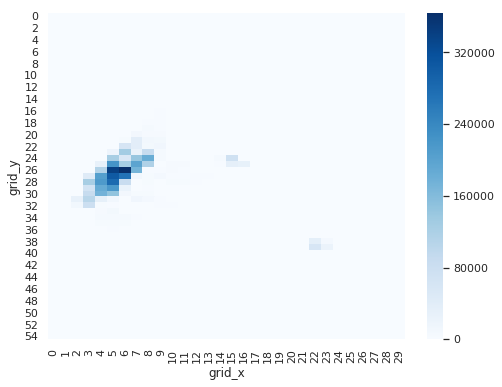

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
plot_demand(rides, ax=ax)

## Plots
2015, 2016 data.

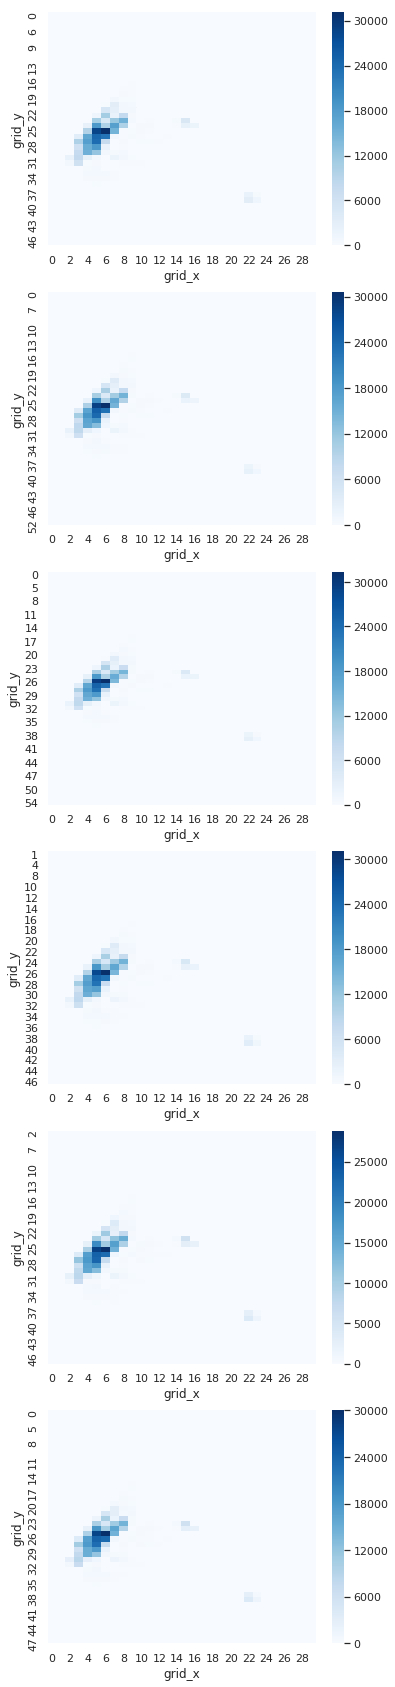

In [6]:
year = '2014'
months = [f'{m+1:02}' for m in range(6)]
csvs = [f'data/yellow_tripdata_{year}-{m}_small.csv' for m in months]

pd.options.mode.chained_assignment = None
nPlots = len(csvs)
fig, axes = plt.subplots(nPlots, 1, figsize=(6, 5*nPlots))
for i, c in enumerate(csvs):
    df = datautils.read_rides(c)
    plot_demand(df, ax=axes[i])
pd.options.mode.chained_assignment = 'warn'

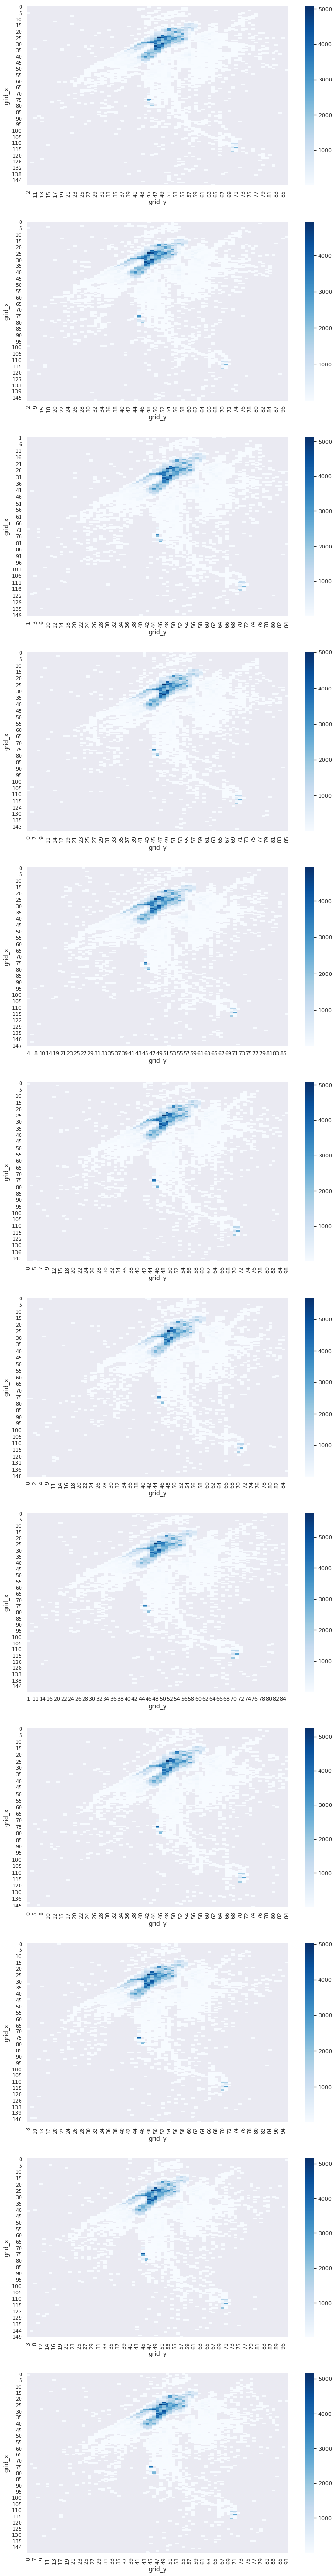

In [4]:
months = [f'{m+1:02}' for m in range(12)]
csvs = [f'data/yellow_tripdata_2015-{m}_small.csv' for m in months]

pd.options.mode.chained_assignment = None
nPlots = len(csvs)
fig, axes = plt.subplots(nPlots, 1, figsize=(12, 8*nPlots))
for i, c in enumerate(csvs):
    df = datautils.read_rides(c)
    plot_demand(df, ax=axes[i])
pd.options.mode.chained_assignment = 'warn'

### Exploratory work

In [4]:
df = datautils.clean_rides(df)

In [6]:
df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,weekday,hour
0,2016-01-16 00:58:18,-73.978806,40.761631,5,0
1,2016-01-31 15:57:16,-73.970840,40.755417,6,15
2,2016-01-31 12:53:58,-73.989174,40.756870,6,12
3,2016-01-28 22:26:50,-73.958321,40.815945,3,22
4,2016-01-20 07:32:15,-73.909248,40.745609,2,7


In [8]:
df['cell_id'] = df[['pickup_latitude','pickup_longitude']].apply(
    lambda row: geoutils.to_grid_cell_id(*row), axis=1)

count    492028.000000
mean       7428.414625
std         840.201541
min         996.000000
25%        6931.000000
50%        7373.000000
75%        7825.000000
max       12930.000000
Name: cell_id, dtype: float64

In [9]:
df['grid_x'] = df.pickup_longitude.apply(geoutils._get_grid_cell_x)
df['grid_y'] = df.pickup_latitude.apply(geoutils._get_grid_cell_y)
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,weekday,hour,cell_id,grid_x,grid_y
0,2016-01-16 00:58:18,-73.978806,40.761631,5,0,7080,30,47
1,2016-01-31 15:57:16,-73.970840,40.755417,6,15,7233,33,48
2,2016-01-31 12:53:58,-73.989174,40.756870,6,12,7226,26,48
3,2016-01-28 22:26:50,-73.958321,40.815945,3,22,5439,39,36
4,2016-01-20 07:32:15,-73.909248,40.745609,2,7,7560,60,50


In [10]:
df.grid_y.describe()

count    492028.000000
mean         49.306550
std           5.580754
min           6.000000
25%          46.000000
50%          49.000000
75%          52.000000
max          86.000000
Name: grid_y, dtype: float64

In [11]:
count = df.groupby(['grid_x', 'grid_y']).size()

In [18]:
sns.heatmap?

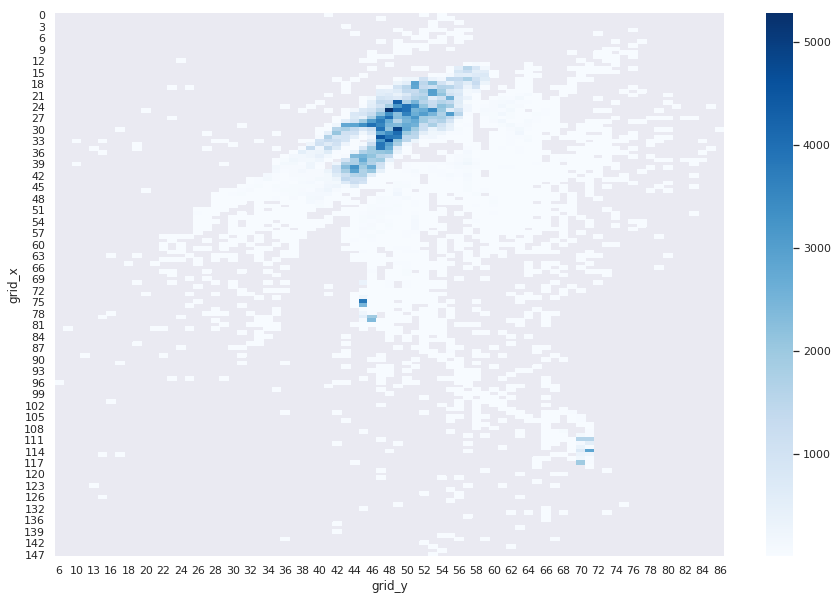

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(count.reset_index(name='count').pivot(index='grid_x', columns='grid_y', values='count'), cmap='Blues')

In [4]:
df.pivot?